**MOHAMED IDRIS R**

**1. Downloading Dataset:Chrun_Modelling**

**2. Load The Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')

**3. Perform**

**Univariate Analysis**

**Bi - Variate Analysis**

**Multi - Variate Analysis**

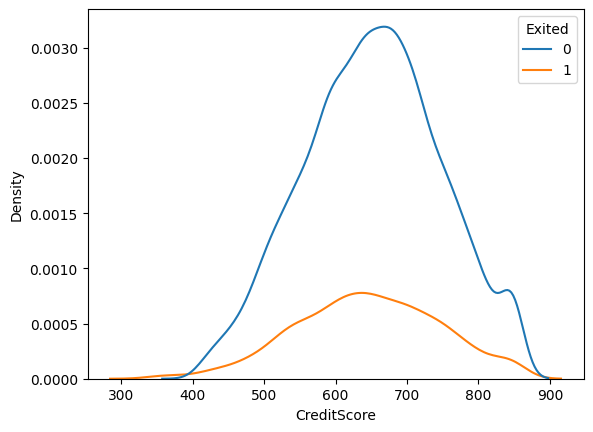

In [5]:
sns.kdeplot(x='CreditScore', data = df , hue = 'Exited')
plt.show()

,index,Exited
0,0,0.7963
1,1,0.2037


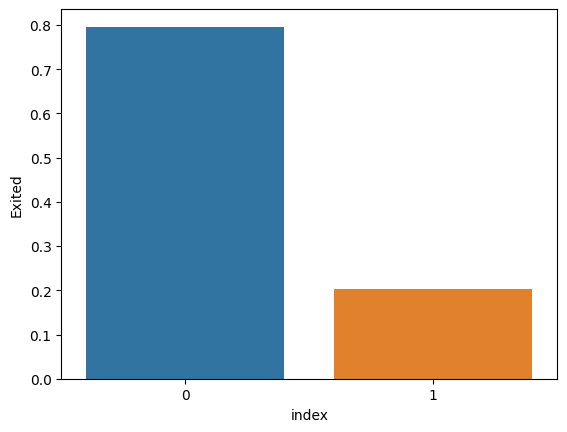

In [6]:
density = df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );
density

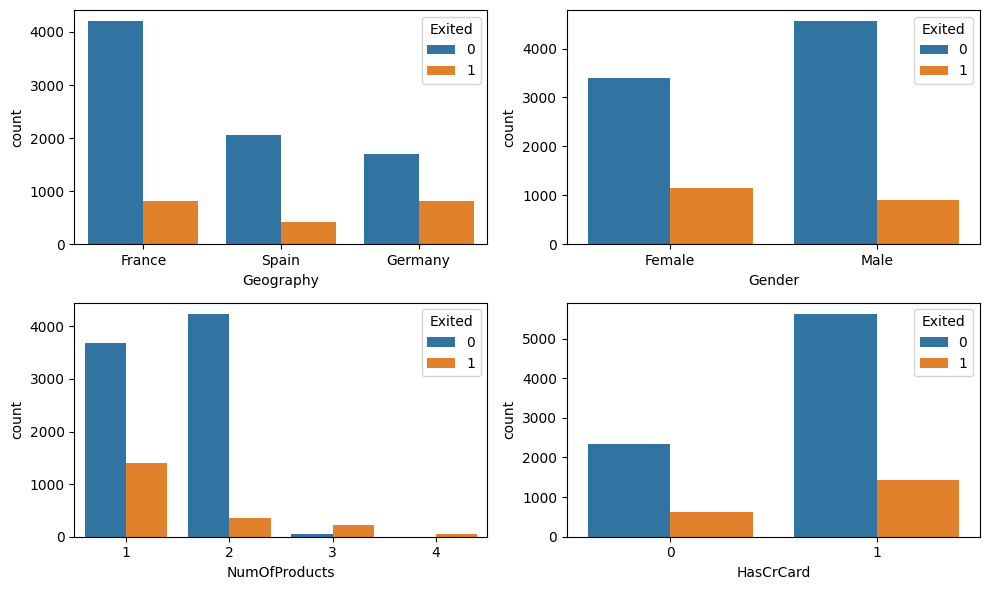

In [7]:
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

**4. Descriptive statistics bold text**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


**5. Handle Missing Values**

In [10]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**In this dataset there is no missing values**

**6. Find the outliers and replace the outliers**

**Finding Outliers**

In [11]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

# of Bivariate Outliers: 19


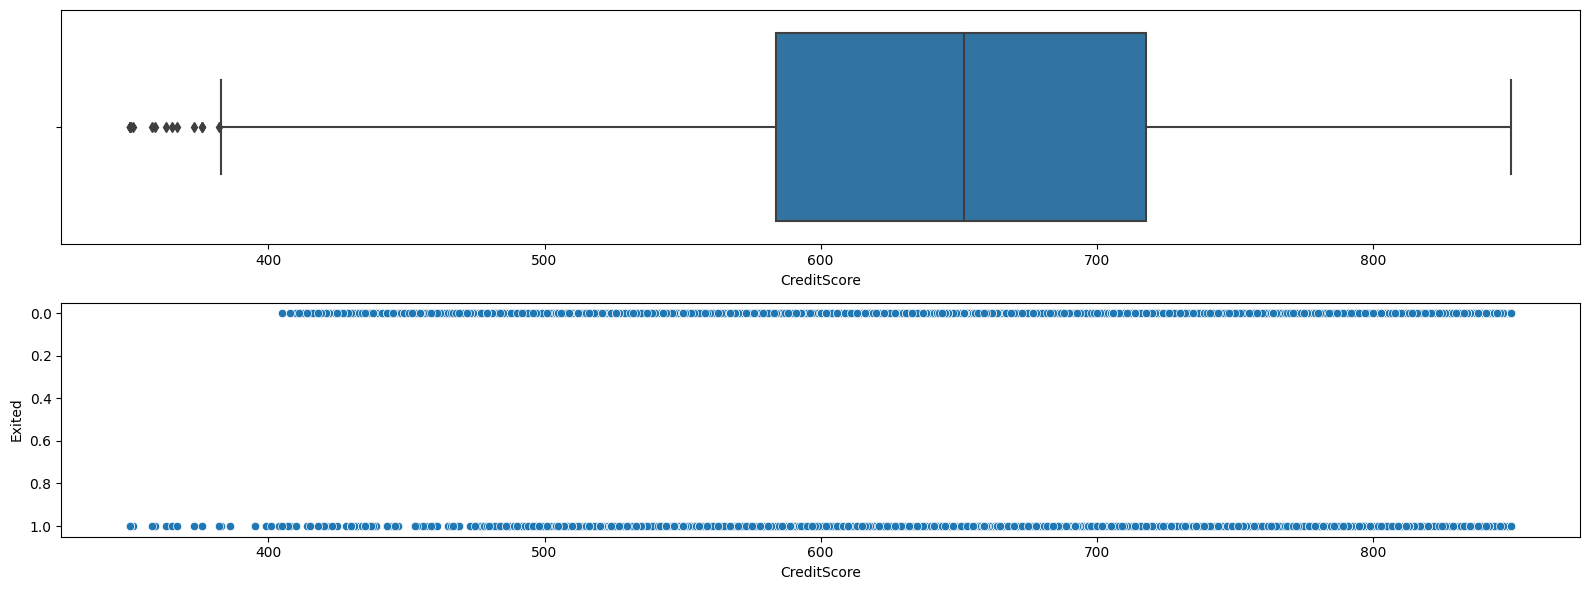

In [12]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


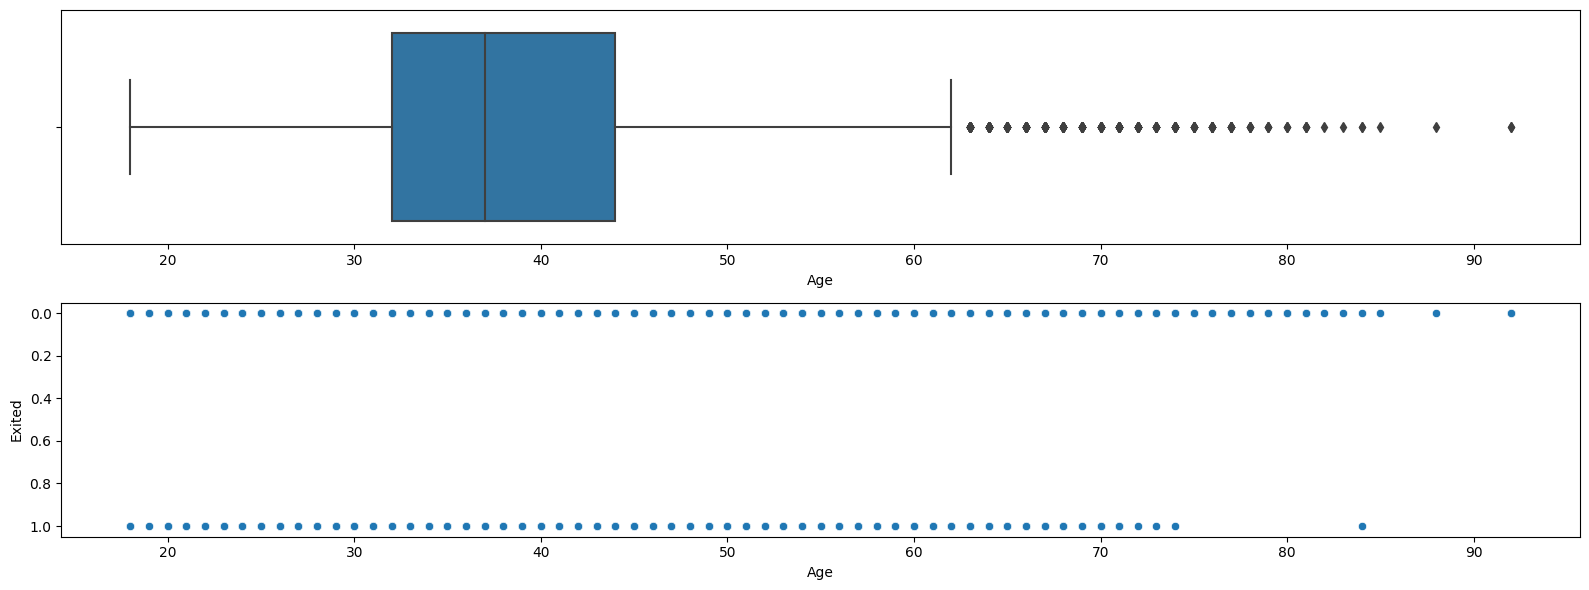

In [13]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


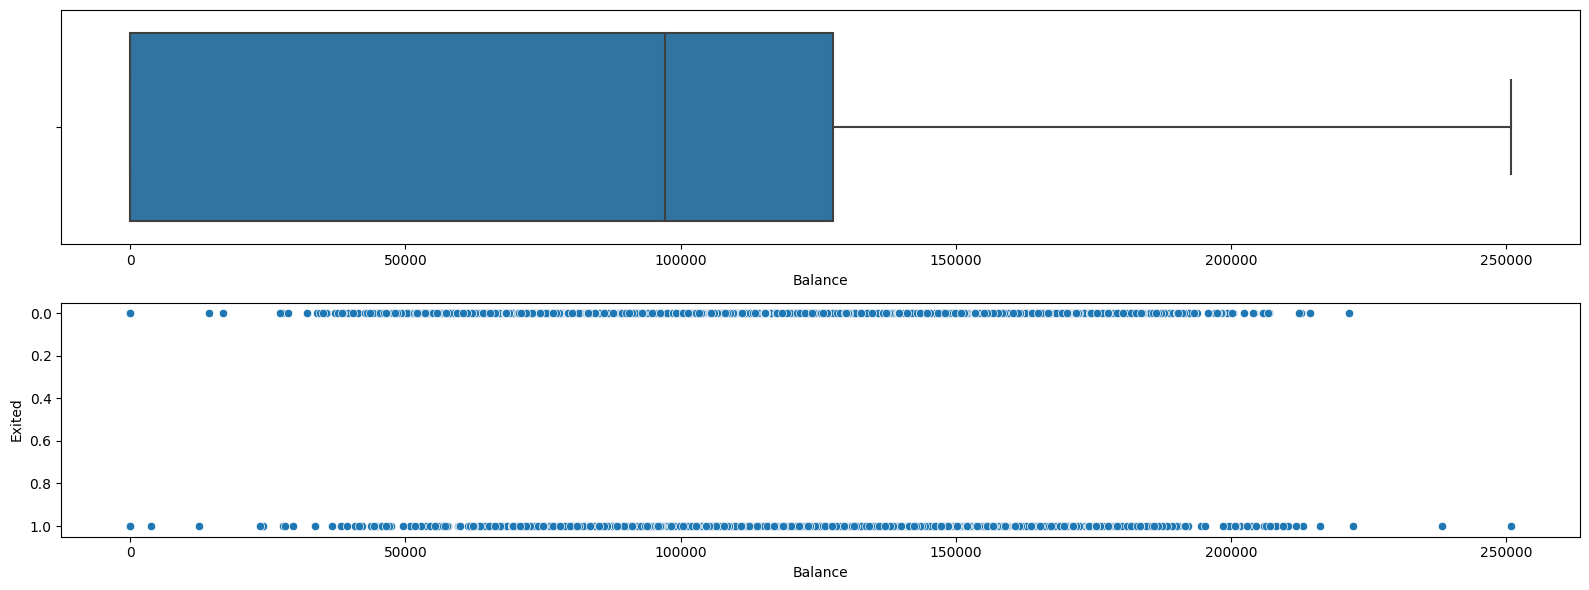

In [14]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

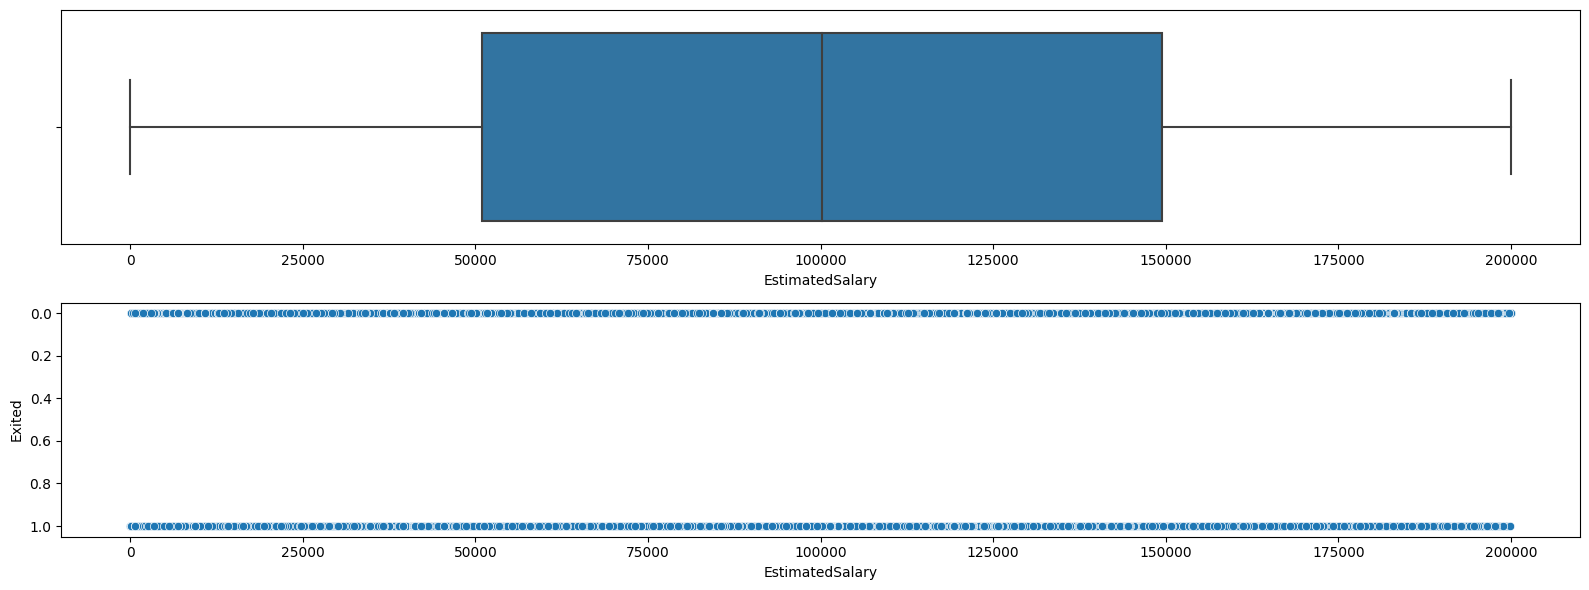

In [15]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

**Removing The Outliers**

In [16]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

# of Bivariate Outliers: 19


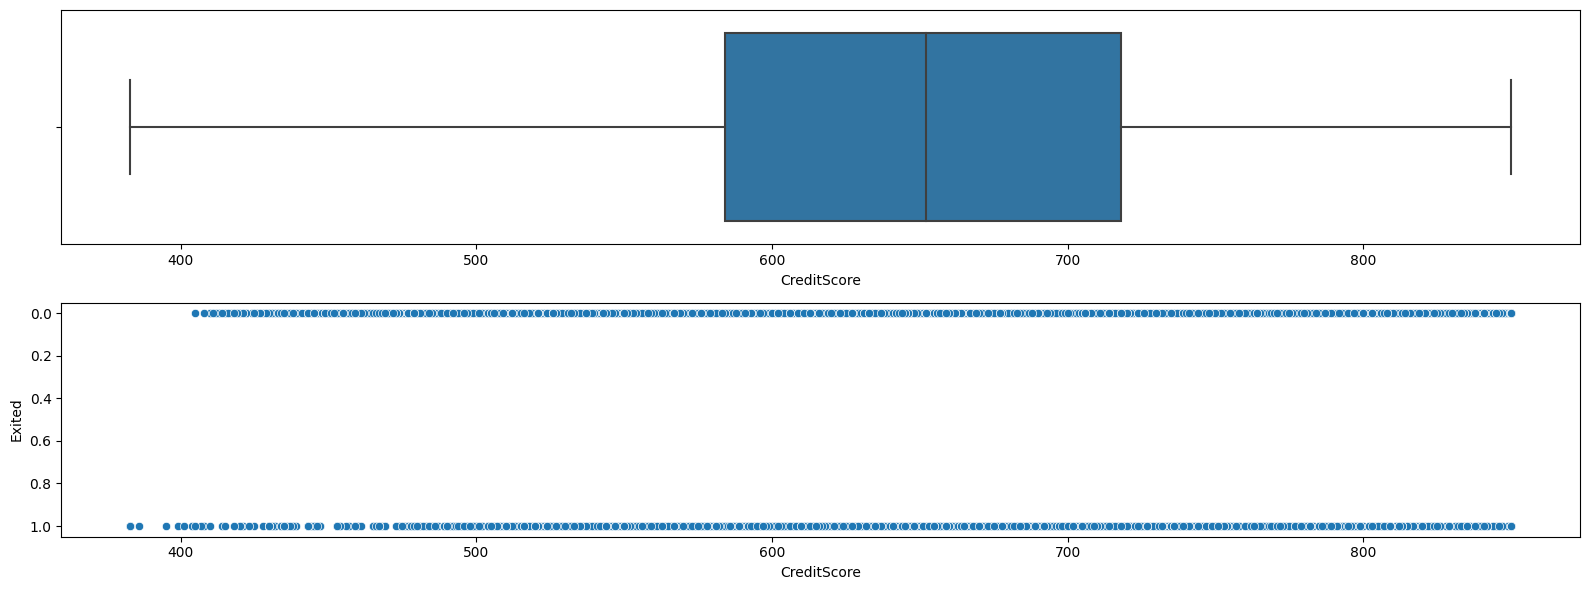

In [17]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 0


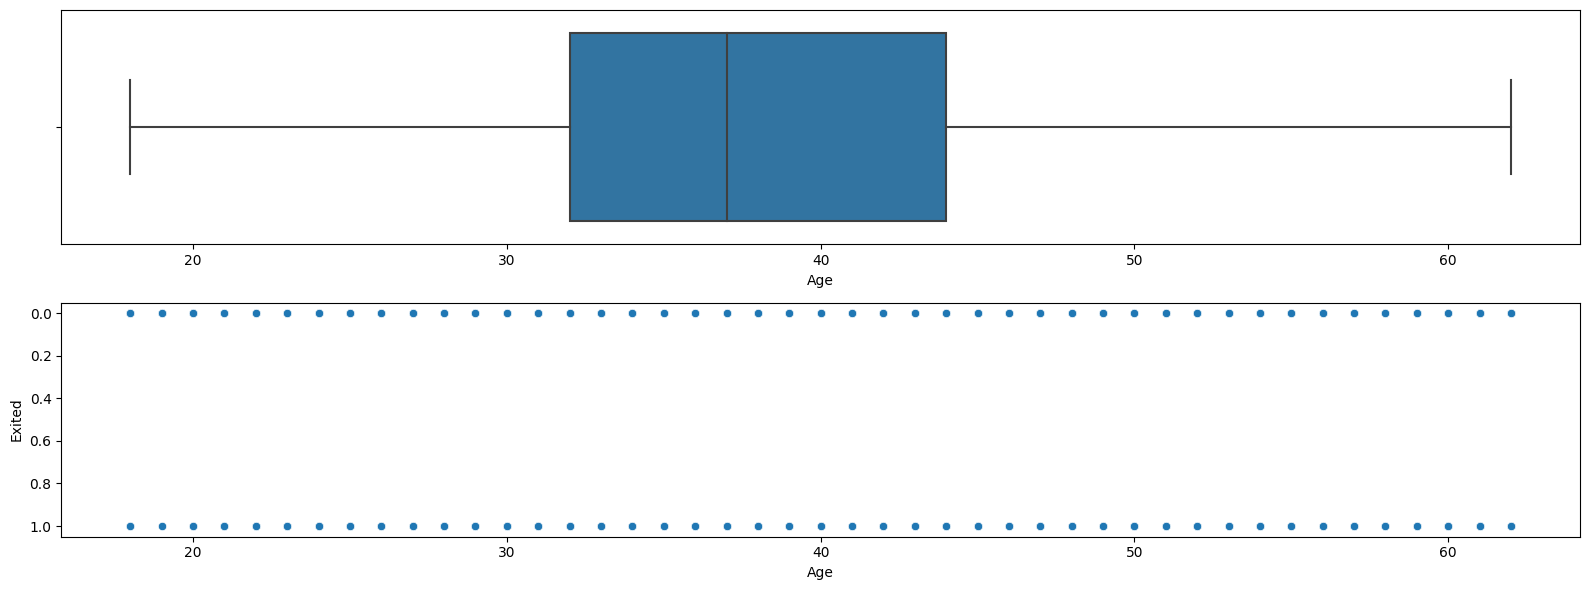

In [18]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


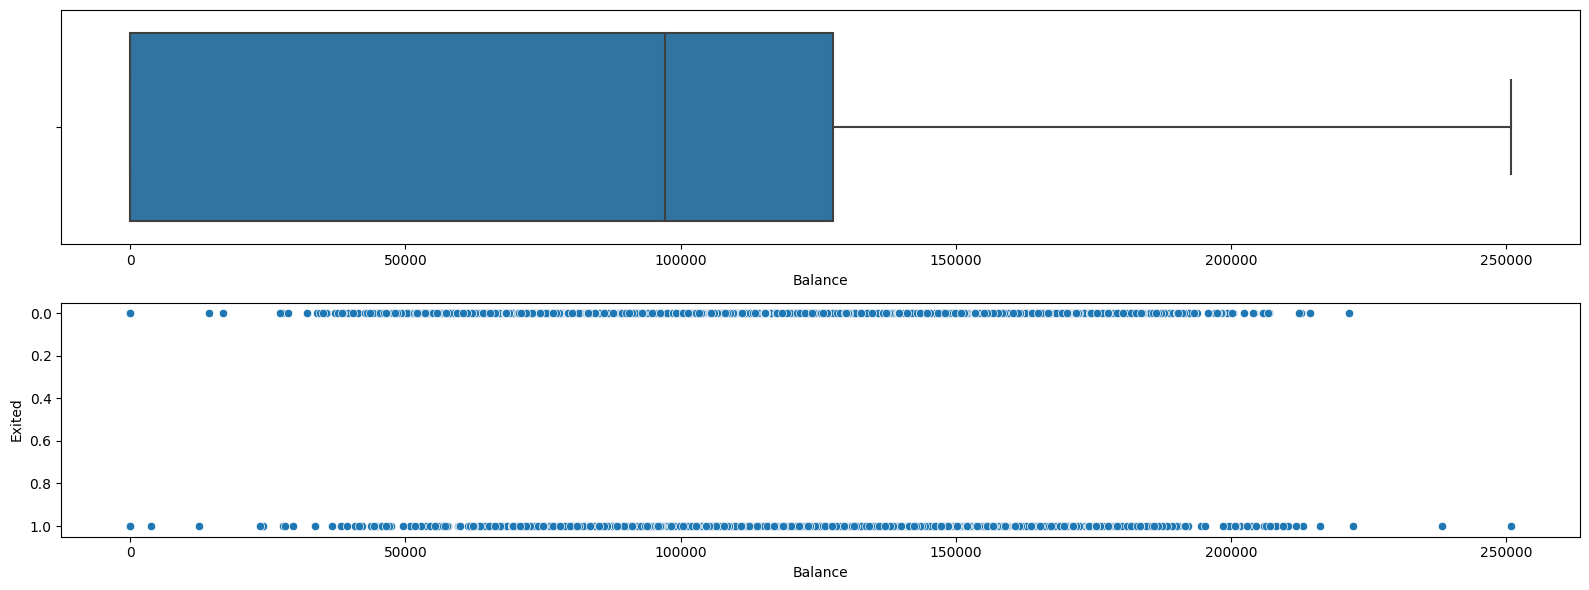

In [19]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

**7. Check for Categorical columns and perform encoding.**

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

**8. Split the data into dependent and independent variables.**

In [21]:
x=df.iloc[:,:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0,0,42.0,2.0,0.00,1.0,1,1,101348.88
1,608.0,2,0,41.0,1.0,83807.86,1.0,0,1,112542.58
2,502.0,0,0,42.0,8.0,159660.80,3.0,1,0,113931.57
3,699.0,0,0,39.0,1.0,0.00,2.0,0,0,93826.63
4,850.0,2,0,43.0,2.0,125510.82,1.0,1,1,79084.10


In [22]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

**9. Scale the independent variables**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
print(x)

[[-0.32687761 -0.90188624 -1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44080365  1.51506738 -1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53863634 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60524449 -0.90188624 -1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25772996  0.30659057  0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.4648682  -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


**10. Split the data into training and testing.**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [25]:
print(x_train.shape)
print(x_test.shape)

(8000, 10)
(2000, 10)


In [26]:
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)
